In [48]:
import time
import warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

In [4]:
warnings.filterwarnings("ignore")

## PCA

In [5]:
mnist = datasets.fetch_openml("mnist_784")

In [7]:
X = mnist.data.values
y = mnist.target.values

X_train = X[:60_000]
y_train = y[:60_000]
X_test = X[-10_000:]
y_test = y[-10_000:]

In [16]:
def train(clf, X_train, X_test, y_train, y_test):
    start = time.time()
    clf.fit(X_train, y_train)
    end = time.time()
    train_time = end - start

    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    print(f"Training time: {train_time:.2f} sec")
    print(f"Accuracy: {accuracy*100:.2f}%")

In [17]:
forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
train(forest_clf, X_train, X_test, y_train, y_test)

Training time: 41.84 sec
Accuracy: 97.05%


In [20]:
pca = PCA(n_components=0.95)
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)

In [21]:
forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
train(forest_clf, X_train_reduced, X_test_reduced, y_train, y_test)

Training time: 126.09 sec
Accuracy: 94.81%


In [24]:
sgd_clf = SGDClassifier(random_state=42)
train(sgd_clf, X_train, X_test, y_train, y_test)

Training time: 111.59 sec
Accuracy: 87.40%


In [25]:
sgd_clf = SGDClassifier(random_state=42)
train(sgd_clf, X_train_reduced, X_test_reduced, y_train, y_test)

Training time: 29.05 sec
Accuracy: 89.59%


## t-SNE

In [27]:
X_sample, y_sample = X_train[:5000], y_train[:5000]

In [28]:
tsne = TSNE(n_components=2, init="random", learning_rate="auto", random_state=42)
X_reduced = tsne.fit_transform(X_sample)

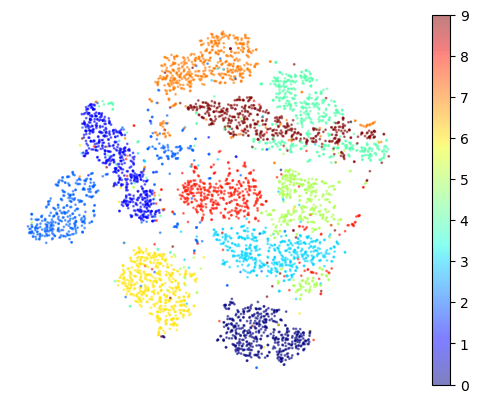

In [42]:
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], s=1, c=y_sample.astype(int), cmap="jet", alpha=0.5)
plt.axis("off")
plt.colorbar()
plt.show()

In [43]:
pca = PCA(n_components=2, random_state=42)
X_reduced = pca.fit_transform(X_sample)

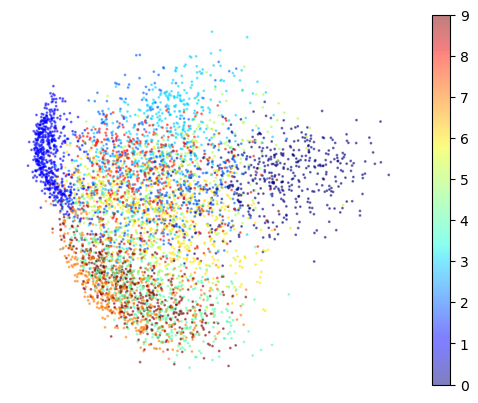

In [44]:
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], s=1, c=y_sample.astype(int), cmap="jet", alpha=0.5)
plt.axis("off")
plt.colorbar()
plt.show()

In [46]:
lle = LocallyLinearEmbedding(n_components=2, random_state=42)
X_reduced = lle.fit_transform(X_sample)

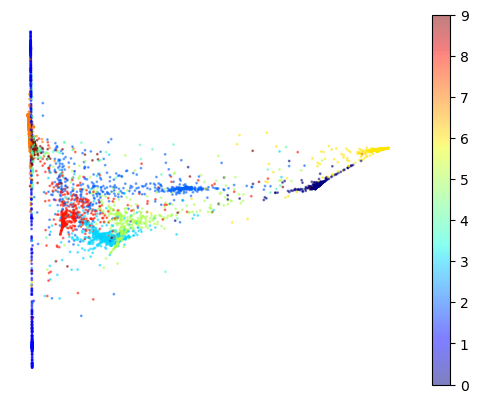

In [47]:
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], s=1, c=y_sample.astype(int), cmap="jet", alpha=0.5)
plt.axis("off")
plt.colorbar()
plt.show()

In [50]:
lda = LinearDiscriminantAnalysis(n_components=2)
X_reduced = lda.fit_transform(X_sample, y_sample)

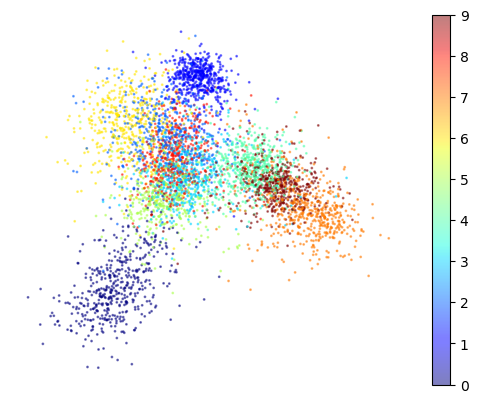

In [51]:
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], s=1, c=y_sample.astype(int), cmap="jet", alpha=0.5)
plt.axis("off")
plt.colorbar()
plt.show()